In [ ]:
# 가정
# 독립성 : 각 집단 내 표본들은 서로 독립적이어야 한다. 즉, 한 표본의 값이 다른 표본의 값에 영향을 미치지 않아야 한다.
# 정규성 : 각 집단의 데이터가 정규분포를 따라야 한다. 특히, 각 집단 내 잔차(residual)가 정규성을 만족하는지 확인한다.
# 등분산성 : 모든 집단의 분산이 서로 동일하거나 거의 비슷해야 한다. 즉, 각 집단의 데이터가 같은 분산을 가져야 한다.

In [ ]:
일원분산분석 검정에서,  표본의 평균이 같으면 처리제곱합이 0이다. 

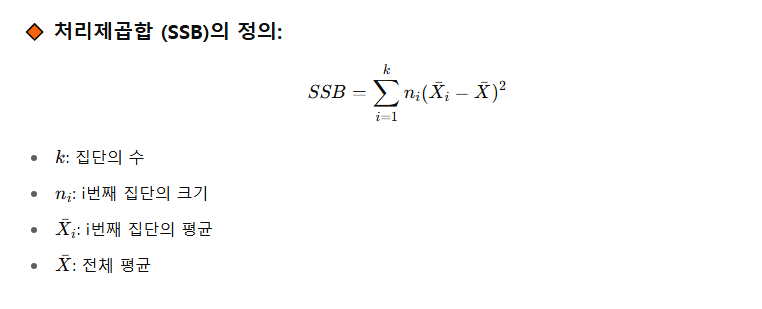
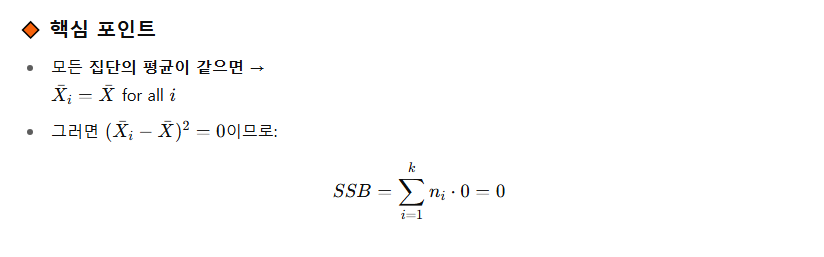

In [8]:
import numpy as np
import pandas as pd

# 샘플 데이터 생성
np.random.seed(0)

groupA = np.random.normal(loc=10, scale=2.0, size=50) # 평균 10, 표준편차 2
groupB = np.random.normal(loc=12, scale=2.0, size=50) # 평균 12, 표준편차 2
groupC = np.random.normal(loc=14, scale=2.0, size=50) # 평균 14, 표준편차 2

df = pd.DataFrame({'A': groupA, 'B': groupB, 'C': groupC})

df.mean()

A    10.281119
B    11.958114
C    14.513070
dtype: float64

In [14]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 모수 검정 (parametric test)
# 목적 : 여러 그룹 간의 평균 차이가 통계적으로 유의미한지를 검정
# 가정 : 각 그룹은 정규분포를 따르고 분산이 같으며(등분산성) 독립된 표본이어야 한다.
# H₀ (귀무가설) : 모든 그룹의 모평균이 같다.
# H₁ (대립가설) : 적어도 하나의 그룹의 평균이 다르다.
# 정규성이나 등분산성이 안 맞는 경우엔 Kruskal-Wallis 등의 비모수 검정 사용

# 그룹 이름과 값을 하나의 DataFrame으로 통합
df_new = pd.DataFrame({
    'value': np.concatenate([groupA, groupB, groupC]),
    'group': ['A']*50 + ['B']*50 + ['C']*50
})

print(df_new)

         value group
0    13.528105     A
1    10.800314     A
2    11.957476     A
3    14.481786     A
4    13.735116     A
..         ...   ...
145  15.888959     C
146  12.174356     C
147  16.234033     C
148  11.368185     C
149  13.076831     C

[150 rows x 2 columns]


In [22]:
# OLS 모델 적합 (종속변수 ~ 독립변수)
model = ols('value ~ C(group)', data=df_new).fit()

# ANOVA 수행
# typ=1 : 순서에 의존
# typ=2 : 평균 중심화된 효과
# typ=3 : 독립 효과 (SPSS 방식과 유사)
anova_results = anova_lm(model, typ=1)
anova_results
# C(group)는 그룹 간 차이에 대한 효과를 나타냄
# sum_sq : 제곱합
# mean_sq : 평균 제곱합, sum_sq / df
# df : 자유도
# F : F 통계량, 그룹 간 변동이 그룹 내 변동보다 얼마나 큰지 비교 (F가 크면 통계적으로 유의)
# PR(>F): p-value (0.05보다 작으면 그룹 간 평균 차이가 유의함)

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,454.158726,227.079363,54.119975,2.438362e-18
Residual,147.0,616.790127,4.195851,NaN,NaN


In [24]:
anova_results['F'][0], anova_results['PR(>F)'][0]

(54.11997511564046, 2.4383623043908716e-18)

In [9]:
# scipy의 f_oneway 사용
from scipy.stats import f_oneway

stat, p_value = f_oneway(df['A'], df['B'], df['C'])
stat, p_value

(54.11997511564093, 2.4383623043902153e-18)

In [13]:
import pandas as pd
import numpy as np

np.random.seed(42)

num_students = 10

# 데이터 생성
data = {
    '국어': np.random.randint(50, 101, size=num_students),
    '영어': np.random.randint(50, 101, size=num_students),
    '수학': np.random.randint(50, 101, size=num_students)
}

# DataFrame 생성
df = pd.DataFrame(data)

df

,국어,영어,수학
0,88,60,79
1,78,73,87
2,64,85,51
3,92,89,70
4,57,73,82
5,70,52,61
6,88,71,71
7,68,51,93
8,72,73,74
9,60,93,98


In [14]:
from scipy.stats import f_oneway

f_oneway(df['국어'], df['영어'], df['수학'])

F_onewayResult(statistic=0.28582330496037567, pvalue=0.7536406574033512)

In [11]:
# wide -> long
df_long = pd.melt(df.reset_index(), id_vars=['index'], 
                  value_vars=['국어', '영어', '수학'],
                  var_name='과목', value_name='점수')

df_long

,index,과목,점수
0,0,국어,88
1,1,국어,78
2,2,국어,64
3,3,국어,92
4,4,국어,57
5,5,국어,70
6,6,국어,88
7,7,국어,68
8,8,국어,72
9,9,국어,60


In [12]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# ols 모델 생성: 점수 ~ C(과목)
model = ols('점수 ~ C(과목)', data=df_long).fit()

# 분산분석표 출력
result = anova_lm(model)
result

,df,sum_sq,mean_sq,F,PR(>F)
C(과목),2.0,108.2,54.100000,0.285823,0.753641
Residual,27.0,5110.5,189.277778,NaN,NaN


In [16]:
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# 데이터 생성
import numpy as np
import pandas as pd

np.random.seed(42)
num_students = 10
df = pd.DataFrame({
    '국어': np.random.randint(50, 101, size=num_students),
    '영어': np.random.randint(50, 101, size=num_students),
    '수학': np.random.randint(50, 101, size=num_students)
})

# 1. scipy f_oneway
f_oneway_result = f_oneway(df['국어'], df['영어'], df['수학'])
print("f_oneway:", f_oneway_result)

# 2. statsmodels anova
df_long = pd.melt(df.reset_index(), id_vars=['index'], 
                  value_vars=['국어', '영어', '수학'],
                  var_name='과목', value_name='점수')
model = ols('점수 ~ C(과목)', data=df_long).fit()
anova_result = anova_lm(model)
print()
print("anova_lm:")
anova_result

f_oneway: F_onewayResult(statistic=0.28582330496037567, pvalue=0.7536406574033512)

anova_lm:


,df,sum_sq,mean_sq,F,PR(>F)
C(과목),2.0,108.2,54.100000,0.285823,0.753641
Residual,27.0,5110.5,189.277778,NaN,NaN
